## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

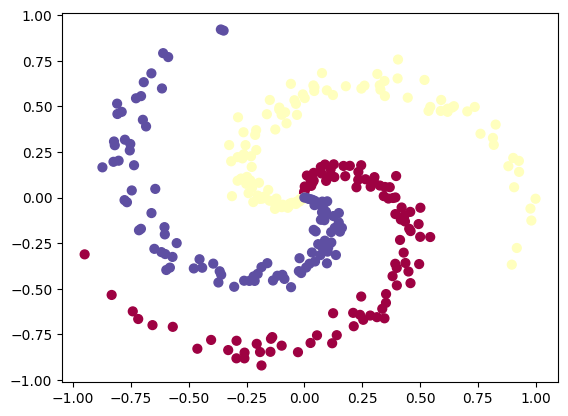

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [4]:
def compute_scores(X, W, b):
    """
    Compute the scores for a linear classifier.
    
    Args:
    - X: Input data of shape (N, D) where N is the number of examples and D is the dimensionality.
    - W: Weights of shape (D, K) where K is the number of classes.
    - b: Biases of shape (K,).
    
    Returns:
    - scores: A matrix of shape (N, K) where each row contains the scores for each class.
    """
    scores = np.dot(X, W) + b
    return scores

# Example usage:
D = X.shape[1] # dimensionality of input data
K = len(np.unique(y)) # number of classes

W = 0.01 * np.random.randn(D, K)
b = np.zeros(K)

# Compute the scores
scores = compute_scores(X, W, b)
print("Scores shape:", scores.shape)

Scores shape: (300, 3)


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [8]:
#SVM Classifier (Hinge Loss)
#Define function

def svm_loss(X, y, W, b, delta=1.0):
    """
    Compute the multiclass SVM loss (hinge loss).

    Args:
    - X: Input data of shape (N, D), where N is the number of examples and D is the dimensionality.
    - y: Vector of class labels of shape (N,).
    - W: Weights of shape (D, K), where K is the number of classes.
    - b: Biases of shape (K,).
    - delta: The margin parameter (usually set to 1).

    Returns:
    - loss: The SVM hinge loss (scalar).
    """
    N = X.shape[0]
    scores = compute_scores(X, W, b)  # Shape (N, K)
    correct_class_scores = scores[np.arange(N), y]  # Shape (N,)

    # Compute the margin
    margins = np.maximum(0, scores - correct_class_scores[:, np.newaxis] + delta)
    margins[np.arange(N), y] = 0  # Do not consider correct class in loss

    # Compute the loss
    loss = np.sum(margins) / N
    return loss

In [5]:
# Softmax Classifier
# Define function

def softmax_loss(X, y, W, b):
    """
    Compute the softmax loss (cross-entropy loss).

    Args:
    - X: Input data of shape (N, D), where N is the number of examples and D is the dimensionality.
    - y: Vector of class labels of shape (N,).
    - W: Weights of shape (D, K), where K is the number of classes.
    - b: Biases of shape (K,).

    Returns:
    - loss: The softmax cross-entropy loss (scalar).
    """
    N = X.shape[0]
    scores = compute_scores(X, W, b)  # Shape (N, K)

    # Shift scores for numerical stability (subtract max score)
    scores -= np.max(scores, axis=1, keepdims=True)

    # Compute softmax probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute the loss
    correct_logprobs = -np.log(probs[np.arange(N), y])
    loss = np.sum(correct_logprobs) / N
    return loss

In [7]:
# Code Implementation
# Example usage:
D = X.shape[1] # dimensionality of input data
K = len(np.unique(y)) # number of classes

W = 0.01 * np.random.randn(D, K)
b = np.zeros(K)

# Compute the SVM loss
svm_loss_value = svm_loss(X, y, W, b)
print("SVM Loss:", svm_loss_value)

# Compute the Softmax loss
softmax_loss_value = softmax_loss(X, y, W, b)
print("Softmax Loss:", softmax_loss_value)


SVM Loss: 2.0009340162429723
Softmax Loss: 1.0989447412602737


### Task 3: Regularization
Add L2 regularization to your loss function.

In [ ]:
# Type your code here

### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [ ]:
# Type your code here

### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
